# COGS 108 - Final Project 

# Overview

We are analyzing how the pandemic has affected the crime rate in California when compared to previous years. We found datasets on the crime rate in the some of the most populated cities: Los Angeles, San Diego, and San Francisco. We then cleaned up the datasets to focus on violent and nonviolent(property) crime. After cleaning the datasets, we created several line graphs to show the difference in crime rates throughout the decade and the effects of covid on crime rates.

# Names

- Dorsa Tayebipour
- Ethan Chen
- Josh Chou
- Sharon Hu

# Research Question

How have the rates of violent and nonviolent (property) crimes shifted individually in California due to the effect of COVID compared to the trends exhibited in the last 10 years?


## Background and Prior Work

With the start of the pandemic, everyday life has changed drastically for everyone around the world. Work and school have become entirely remote with little to no human interaction outside of family and housemates. Public events have diminished greatly with increased restrictions on social gatherings, businesses have been forced to close their doors, and the current idea of safety is vastly different compared to a year ago. 

Our group wanted to focus on the crime aspect of safety, or specifically how violent and nonviolent crimes have changed in California as a result of covid-19. In order to analyze the effects of the pandemic, we compared crime rates in the last decade to the crime rates in the months of covid-19. We also compared the crime trends to significant events in 2020 such as the protests for George Floyd or the reopening of businesses. In addition, we wanted to focus on California because it is currently the most populated state. For our research, nonviolent crimes are referred to as property crimes. Property crimes are crimes that usually involve private property, such as burglary, larceny, and auto theft. For violent crimes, some examples include homicide, rape, and aggravated assault. 

## Prior Work:

We decided to focus on crime rates due to the multiple sources of conflicting information about how the consequences of covid-19, unemployment, and quarantine have affected crime rates. For example, this article [1] explains that crime rates have decreased since the beginning of the year, contradicting this other analysis [2] that claims an increase in crime rates as a result of unemployment. Intuitively this is hard to answer, as we can see how the masses working from home would deter property crime, but also how a rise in unemployment can cause a spike in theft. Thus, our group wanted to dive into the data ourselves to see if we can analyze the trends to find out how the crime rates actually shifted this year in comparison to the past.

#### References (include links):
- 1) https://www.miamiherald.com/news/coronavirus/article244393022.html 
- 2) https://www.safewise.com/blog/covid-19-crimes/ 

# Hypothesis


Our hypothesis is that violent crimes in California have gone down due to a decrease in public events and nonviolent crimes (property crimes) have increased due to economic hardships. We also predict that specific events throughout the pandemic will have varying effects on the crime rates.

# Datasets

Dataset 1 for Los Angeles
- Dataset Name: Crime Data from 2009 to Present
- Link to the dataset: https://data.lacity.org/Public-Safety/Crime-Data-from-2020-to-Present/2nrs-mtv8
- Link to the dataset: https://data.lacity.org/A-Safe-City/Crime-Data-from-2010-to-2019/63jg-8b9z
- Number of observations: 2,296,344
- This dataset shows the crime in Los Angeles City from 2009 to 2019 and 2020 to Present. Each observation classifies the type of crime that was reported. 


Dataset 2 for San Francisco
- Dataset Name: Police Department Incident Reports: Historical 2003 to Present
- Link to the dataset: https://data.sfgov.org/Public-Safety/Police-Department-Incident-Reports-Historical-2003/tmnf-yvry
- Number of Observations: 2,160,953
- This datset shows the crime in San Francisco City from 2003 to 2018 and 2018 to 2020. Each observation reports the type of crime, date, time, as well as location of the crime. 


Dataset 3 for San Diego
- Dataset Name: Automated Regional Justice Information System
- Link to the dataset: http://crimestats.arjis.org/default.aspx 
- Number of Observations: 402,213
- This data set shows the crime in San Diego from 2009 to 2020. Each observation shows the type of crime as well as the number of occurence each month.



# Setup

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data Cleaning

### San Francisco Data Cleaning

The first step that we took to clean our San Francisco dataset was to remove the columns of identifying information, such as street address, gender, ethnicity, and age to ensure that our data respects the privacy of citizens. After removing the identifying information columns in San Francisco, we wanted to categorize the nonviolent and violent crimes by incident codes.

In [2]:
#Create dataframe for dataset
SF_df = pd.read_csv(r'CSV files/Source CSVs/SF Crime Trimmed.csv')

#Drop columns containing identifying information
Cut_df = SF_df[['Date','Category','Incident Code']]

#Group crime by incident codes
count_df = SF_df.groupby(['Category','Incident Code'])['Date'].count()
count_df

Category     Incident Code
ARSON        26029             291
             26030            1242
             26031            1476
             26032             168
             26033               6
                              ... 
WEAPON LAWS  26028              92
             26213              23
             27122             153
             27173              77
             30140             793
Name: Date, Length: 938, dtype: int64

However, we realized that several incident codes were identified as the same crime category. Therefore, we decided to categorize the nonviolent and violent crimes by the category of crime instead of using incident codes. For example, we categorized every crime labeled "arson" as "violent".

In [3]:
#Group dataset by category and date of crime
category_df = Cut_df.groupby(['Category'])['Date'].count()

#Categorizing crime under violent or nonviolent
violent = "ARSON, ASSAULT, BURGLARY, EXTORTION, KIDNAPPING, MISSING PERSON, ROBBERY, FORCIBLE, WEAPON LAWS"
nonviolent = "BAD CHECKS, BRIBERY, BURGLARY, DISORDERLY CONDUCT, DRIVING UNDER THE INFLUENCE, DRUG/NARCOTIC, DRUNKENNESS, EMBEZZLEMENT, FAMILY OFFENSES, FORGERY/COUNTERFEITING, FRAUD, GAMBLING, LARCENY/THEFT, LIQUOR LAWS, LOITERING, NON-CRIMINAL, OTHER OFFENSES, PORNOGRAPHY/OBSCENE MAT, PROSTITUTION, RECOVERED VEHICLE, ROBBERY, SECONDARY CODES, NON FORCIBLE, STOLEN PROPERTY, SUICIDE, SUSPICIOUS OCC, TREA, TRESPASS, VANDALISM, VEHICLE THEFT, WARRANTS" 

#Create function that creates strings into list
def convert(string): 
    
    output = list(string.split(", ")) 
    
    return output

#Use convert function
violent_list = convert(violent)
non_violent_list = convert(nonviolent)

#Create function to catgeorize rows with either violent or nonviolent
def categorize_crime_code(string):
    
    if str(string) in violent_list:
        
        return 'violent'
    
    else:
        
        return 'nonviolent'

#Apply function to dataset
Cut_df['categorized crime'] = Cut_df['Category'].apply(categorize_crime_code)

After categorizing the crime into violent or nonviolent, we summed up the occurrences of violent and nonviolent crime. Then, we grouped the crime by each month for every year.

In [4]:
#Format the date column
Cut_df['Date'] = pd.to_datetime(Cut_df['Date']).dt.strftime('%m-%Y')

#Group the amount of crime by each month
Df_month = Cut_df.groupby(by = ['Date', 'categorized crime']).size().to_frame('amount').reset_index()

#Separate 2020 from other year
Df_month = Df_month[Df_month['Date'].str.split('-').str[1].astype(int) < 2020]
Df_month = Df_month[Df_month['Date'].str.split('-').str[1].astype(int) > 2010]

In [5]:
#Create copy
Df_month_drop = Df_month.copy()

#Clean up formatting
Df_month_drop.drop(Df_month_drop.tail(2).index,inplace=True)
Df_month_drop.columns = ["Date","categorized crime","amount"]

#Output to CSV
Final_df = Df_month_drop
#Final_df.to_csv("CSV Files/SF_Cleaned_Data_2010_to_2019.csv", index = False)
Final_df.head(5)

,Date,categorized crime,amount
16,01-2011,nonviolent,9086
17,01-2011,violent,2149
18,01-2012,nonviolent,9051
19,01-2012,violent,2247
20,01-2013,nonviolent,10099


After we summed up the occurrences of violent and non-violent crimes and sorted them by the month of each year, we condensed the monthly tally into an annual one in order to compare trends over an extended period of time.

### Los Angeles Data Cleaning: 

The LA dataset was by far the largest and most detailed database out of the three cities we handled because the dataset contained over 2 million entries from the last 10 years. The following script trims out personal details as well as extraneous data, organizes each of the cells into either violent or nonviolent crime, and sums up the results by month. The below example is ran on a snippet of the 2020 data as the full file is too large to include on github (124 mb!).

In [6]:
#Read in File, store in Ch_df
csv_path = r'CSV Files/Source CSVs/LA_Crime_Data_from_2020_to_Present.csv'
Ch_df = pd.read_csv(csv_path)

#Trim down to relevant data columns
Cut_df = Ch_df[['Crm Cd','Crm Cd Desc','Date Rptd']]

#Categorize crime codes into violent or nonviolent
violent = "434, 753, 922, 622, 435, 250, 882, 840, 942, 436, 924, 870, 446, 113, 822, 760, 845, 921, 926, 122, 330, 341, 210, 755, 236, 626, 220, 648, 121, 761, 627, 251, 920, 110, 910, 860, 235, 886, 625, 901, 762, 813, 821, 820, 956, 932, 850, 763, 928, 810, 902, 815, 943" 
non_violent = "653, 950, 450, 661, 806, 805, 453, 443, 437, 345, 438, 933, 654, 903, 944, 421, 353, 949, 474, 347, 666, 880, 473, 439, 451, 487, 433, 954, 890, 472, 865, 475, 444, 948, 471, 470, 652, 452, 349, 485, 884, 931, 814, 952, 830, 445, 432, 906, 522, 905, 900, 740, 946, 442, 230, 624, 237, 440, 930, 745, 310, 647, 343, 331, 510, 441, 350, 888, 520, 649, 623, 420, 480, 410, 320, 664, 668, 662, 352, 670, 351, 756, 660, 951, 940"

#Use convert function to create crime codes into list
violent_list = convert(violent) 
non_violent_list = convert(non_violent)

We created a `categorize_crime_code` function that sorts each row of the dataset into violent or nonviolent. Then, we applied the nonviolent and violent into a new column of the dataframe. Finally, we summed up all the rows based on this new column to create a new dataframe.

In [7]:
#Create function to catgeorize rows with either violent or nonviolent
def categorize_crime_code(string):
    if str(string) in violent_list:
        return 'violent'
    else:
        return 'nonviolent'

#Apply function to dataset
Cut_df['categorized crime'] = Cut_df['Crm Cd'].apply(categorize_crime_code)

#Format the date column
Cut_df["Date Rptd"] = pd.to_datetime(Cut_df["Date Rptd"]).dt.strftime('%m-%Y')

#Group the amount of crime by each month
Df_2020_month = Cut_df.groupby(by = ["Date Rptd", "categorized crime"]).size().to_frame('amount').reset_index()
Df_2020_month_drop = Df_2020_month.copy()

#Clean up formatting
Df_2020_month_drop.drop(Df_2020_month_drop.tail(2).index,inplace=True)
Df_2020_month_drop.columns = ["Date","categorized crime","amount"]

#output to CSV
Final_df = Df_2020_month_drop
#Final_df.to_csv("CSV Files/LA_Cleaned_Data_2020.csv", index = False)
Final_df.head(3)

C:\Users\husha\anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
C:\Users\husha\anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


,Date,categorized crime,amount
0,01-2020,nonviolent,10995
1,01-2020,violent,4996
2,02-2020,nonviolent,11592


We used the same script on the larger Los Angeles Crime dataset that contained crime data from 2010 to 2019.

### San Diego Data Cleaning:

We obtained San Diego crime datasets yearly from 2010 to 2020. Below is an example of how we cleaned 2019 San Diego dataset. After cleaning the data for every year, we concatenated all the years together to create a dataset from 2010 to 2020.

In [8]:
#Reading data from csv file
df_SD = pd.read_csv(r'CSV files/Source CSVs/CrimeStats_SD_2019.csv')

#Considering rows No.9 to No.14
df_SD = df_SD.loc[[9, 14]]

#Changing index name
df_SD.index = ['nonviolent','violent']

#Droping the following columns 
df_SD = df_SD.drop(columns = ['SORT_ORDER', 'Crime', 'Total'])

#Transposing the dataframe
df_SD = df_SD.transpose()

#Reshaping data frame
df_SD_categorized = df_SD.stack()
pd.set_option("display.max_rows", None)
df_cleaned_SD = df_SD_categorized.reset_index()
df_cleaned_SD.columns = ['Date','categorized crime','amount']

#Changing the data type of 'Date' coloumn
df_cleaned_SD['Date'] = df_cleaned_SD['Date'] .apply(str)

#Changing the year format from YY to YYYY
i = 0
for i, row_value in df_cleaned_SD['Date'].iteritems():
    add_string = '20' 
    ls = df_cleaned_SD['Date'][i] 
    ls = ls[:4] + '20' + ls[4:]
    df_cleaned_SD['Date'][i] = ls 
    
#Saving dataframe in csv file 
#df_cleaned_SD.to_csv(r'CSV files/Source CSVs/Cleaned_SD_Data_2020.csv', index = False)

C:\Users\husha\anaconda3\lib\site-packages\ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


# Data Analysis & Results

Our goal is to determine whether crime has been influenced by the pandemic or if it is just part of a larger trend of crime in the last decade. We did this by creating line graphs to visualize the changes in crime rates from 2009 to 2019 for each city. We then looked at the monthly change in crime rate for each month from 2019 to 2020 to see how the pandemic has affected the crime rate. We also compared significant events such as the highest point of unemployment or the reopening of businesses to view how the crime rates changed throughout the pandemic.

There are four main significant dates that we use to compare the changes in crime throughout the pandemic: 

- The first significant date we used was March 13th, the day that COVID was declared a national emergency. The national emergency required everyone to quarantine, forcing many businesses to close. Moreover, many people lost their jobs as businesses closed. According to “California Unemployment Rate”, the unemployment rate jumped up from 3.5% to 4.4% throughout the month of March. By April, the unemployment rate in California was 16.40%.

- The next significant event we compared the crime rate trends to was April 14th, the day Governor Gavin Newsom announced a gradual plan to lift shelter in place orders. Lifting the in place orders meant that residents in California no longer had to abide by the stay in door order. The announcement also opened up the opportunity for more public interactions and stores to reopen.

- The third significant event that occurred was the official reopening of businesses on May 4th. The reopening of businesses brought in employment opportunities. In addition, open dining and take out in restaurants allowed for more public interactions.

- The fourth event we compared crime rates to was the beginning of protests for the death of George Floyd in late May continuing to the creation of the Black Lives Matter (BLM) movements in July. Throughout these months, many people participated in both violent and nonviolent protests to fight for the justice of George Floyd’s death. The protests along with the increase in public interaction may have influenced the changes in crime rates


In [20]:
#Read cleaned data csv file for 2020
df_LA2020 = pd.read_csv(r'CSV files/LA_Cleaned_Data_2020.csv')
df_SF2020 = pd.read_csv(r'CSV files/SF_Cleaned_Data_2020.csv')
df_SD2020 = pd.read_csv(r'CSV files/SD_Cleaned_Data_2020.csv')

#Read cleaned data csv file for 2019
df_LA2019 = pd.read_csv(r'CSV files/LA_Cleaned_Data_2010_to_2019.csv')
df_SF2019 = pd.read_csv(r'CSV files/SF_Cleaned_Data_2010_to_2019.csv')
df_SD2019 = pd.read_csv(r'CSV files/SD_Cleaned_Data_2010_to_2019.csv')

In [10]:
#Create dataframe for only 2019 data
df_LA2019 = df_LA2019[df_LA2019['Date'].str.contains('2019')]
df_SF2019 = df_SF2019[df_SF2019['Date'].str.contains('2019')]
df_SD2019 = df_SD2019[df_SD2019['Date'].str.contains('19')]

In [11]:
#Create dataframe that combines 2019 and 2020 data
df_LA2019_2020 = df_LA2019.append(df_LA2020, ignore_index=True)
df_SF2019_2020 = df_SF2019.append(df_SF2020, ignore_index=True)
df_SD2019_2020 = df_SD2019.append(df_SD2020, ignore_index=True)

In [12]:
#Drop last month with incomplete data
df_SF2019_2020.drop(df_SF2019_2020.tail(2).index, inplace = True)
df_SD2019_2020.drop(df_SD2019_2020.tail(2).index, inplace  =True)

In [13]:
#Create dataframes for violent and nonviolent
df_LAviolent = df_LA2019_2020[df_LA2019_2020['categorized crime'] == 'violent']
df_LAnonviolent = df_LA2019_2020[df_LA2019_2020['categorized crime'] == 'nonviolent']

df_SFviolent = df_SF2019_2020[df_SF2019_2020['categorized crime'] == 'violent']
df_SFnonviolent = df_SF2019_2020[df_SF2019_2020['categorized crime'] == 'nonviolent']

df_SDviolent = df_SD2019_2020[df_SD2019_2020['categorized crime'] == 'violent']
df_SDnonviolent = df_SD2019_2020[df_SD2019_2020['categorized crime'] == 'nonviolent']

### Graphing Los Angeles Data

Text(17.5, 12450, 'BLM Protests')

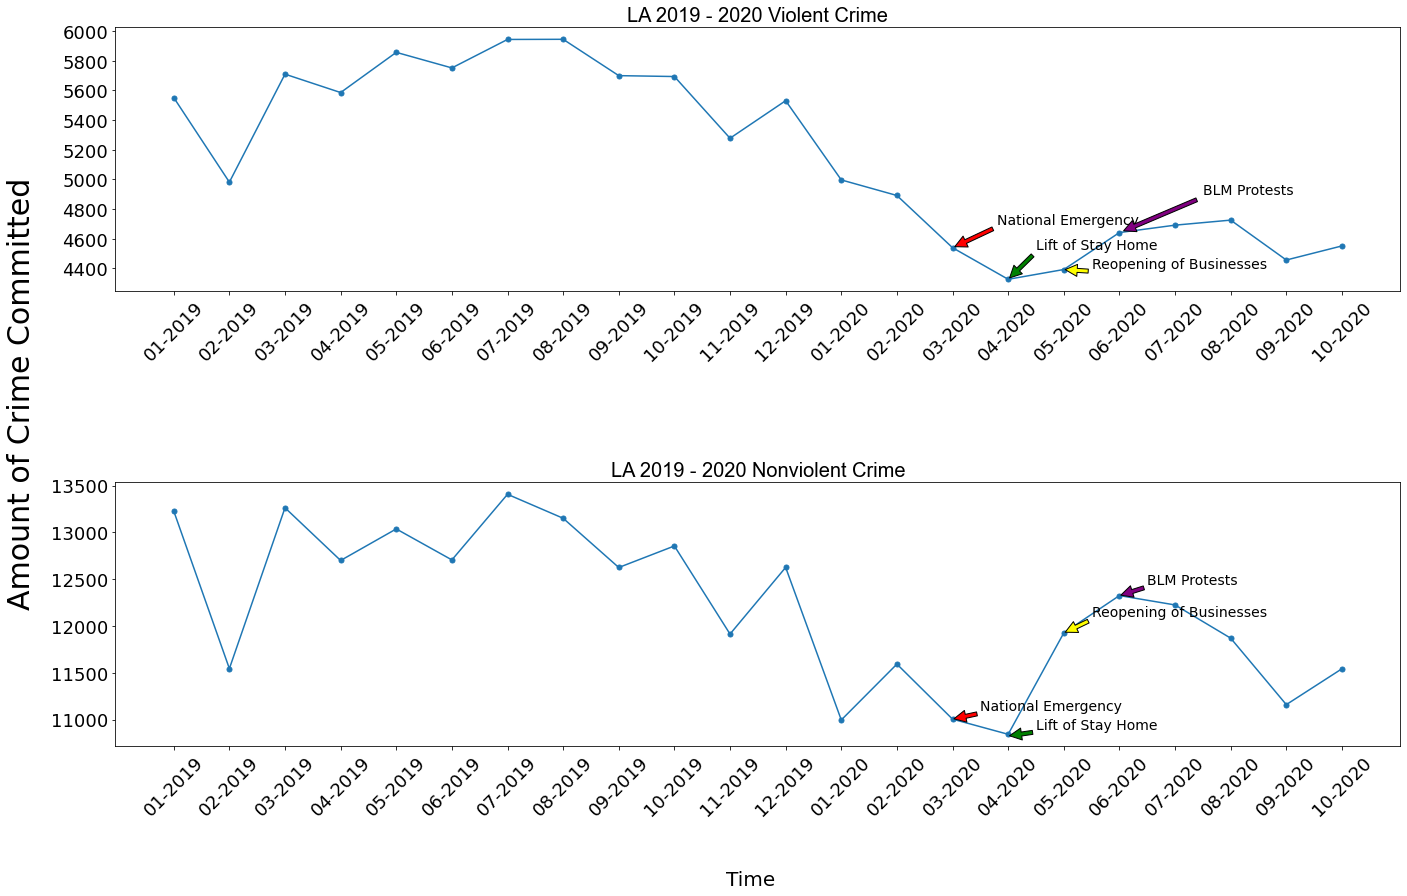

In [95]:
#Create x-axis
date = df_LAviolent['Date'].to_numpy()
date_list = list(date)

#Create y-axis
violent = df_LAviolent['amount'].to_numpy()
violent_list = list(violent)

nonviolent = df_LAnonviolent['amount'].to_numpy()
nonviolent_list = list(nonviolent)

#Declare figure size
fig, (ax1, ax2) = plt.subplots(2, figsize = (20,15))
fig.tight_layout(pad=17.0)
for ax in ax1,ax2:
    plt.setp(ax.get_xticklabels(), rotation = 45)
    for item in (ax.get_xticklabels() + ax.get_yticklabels()):
        item.set_fontsize(18)

#Label graph
ax1.set_title('LA 2019 - 2020 Violent Crime', fontdict = {'fontname': 'Arial', 'fontsize': 20})
ax2.set_title('LA 2019 - 2020 Nonviolent Crime', fontdict = {'fontname': 'Arial', 'fontsize': 20})
fig.text(0.5, 0.05, 'Time', ha='center', va='center', fontsize = 20)
fig.text(0.06, 0.5, 'Amount of Crime Committed', ha='center', va='center', rotation='vertical', fontsize = 30)

#Create line graph
ax1.plot(date_list, violent_list, marker = '.', markersize = 10)
ax2.plot(date_list, nonviolent_list, marker = '.', markersize = 10)


#Annotating the important point
ax1.annotate('National Emergency', xy=(14, 4539), xytext=(14.8, 4700), fontsize = 14, arrowprops=dict(facecolor='red', shrink=0.05), )
ax1.annotate('Lift of Stay Home', xy=(15, 4326), xytext=(15.5, 4530), fontsize = 14, arrowprops=dict(facecolor='green', shrink=0.05), )
ax1.annotate('Reopening of Businesses', xy=(16, 4392), xytext=(16.5, 4400), fontsize = 14, arrowprops=dict(facecolor='yellow', shrink=0.05), )
ax1.annotate('BLM Protests', xy=(17, 4641), xytext=(18.5, 4900), fontsize = 14, arrowprops=dict(facecolor='purple', shrink=0.05), )
ax2.annotate('National Emergency', xy=(14, 11004), xytext=(14.5, 11100), fontsize = 14, arrowprops=dict(facecolor='red', shrink=0.05), )   
ax2.annotate('Lift of Stay Home', xy=(15, 10824), xytext=(15.5, 10900), fontsize = 14, arrowprops=dict(facecolor='green', shrink=0.05), )          
ax2.annotate('Reopening of Businesses', xy=(16, 11925), xytext=(16.5, 12100), fontsize = 14, arrowprops=dict(facecolor='yellow', shrink=0.05), )          
ax2.annotate('BLM Protests', xy=(17, 12324), xytext=(17.5, 12450), fontsize = 14, arrowprops=dict(facecolor='purple', shrink=0.05), )          

These graphs illustrate the monthly crime trends from 2019 to 2020. There were no notable outliers in our graph. However, the range of crime committed in Los Angeles is much higher than the range of crime committed in San Diego and San Francisco. For example, the range of violent crime in San Francisco is 900 to 1500 while the range in violent crime in Los Angeles is 4,400 to 6,000. The difference in ranges is due to the population of Los Angeles. The population in Los Angeles is almost twice the size of the population of San Diego and San Francisco combined. When comparing the amount of crime in 2019 to 2020, there were more nonviolent and violent crimes in 2019 compared to 2020.

By viewing the four notable dates, we can observe the changes in the amount of crime. The first date, March 13, showed that there was a decrease in both nonviolent and violent crime in the month. From March to April, the unemployment rate increased from 3.5% to its highest point of 16.40%. Moreover, the stay in restriction was lifted in April. However, as unemployment increased and public interactions opened, the crime rate interestingly dropped even more to an all time low in the past two years during April. In May, when outdoor businesses began to reopen, violent crime rates slightly rose and nonviolent crimes shot up drastically. In June 2020, nonviolent crimes were at its highest point and this may be explained by protests for BLM. These protests and sometimes riots could have led to actions such as vandalism and looting, spiking the crime rates for that time period.

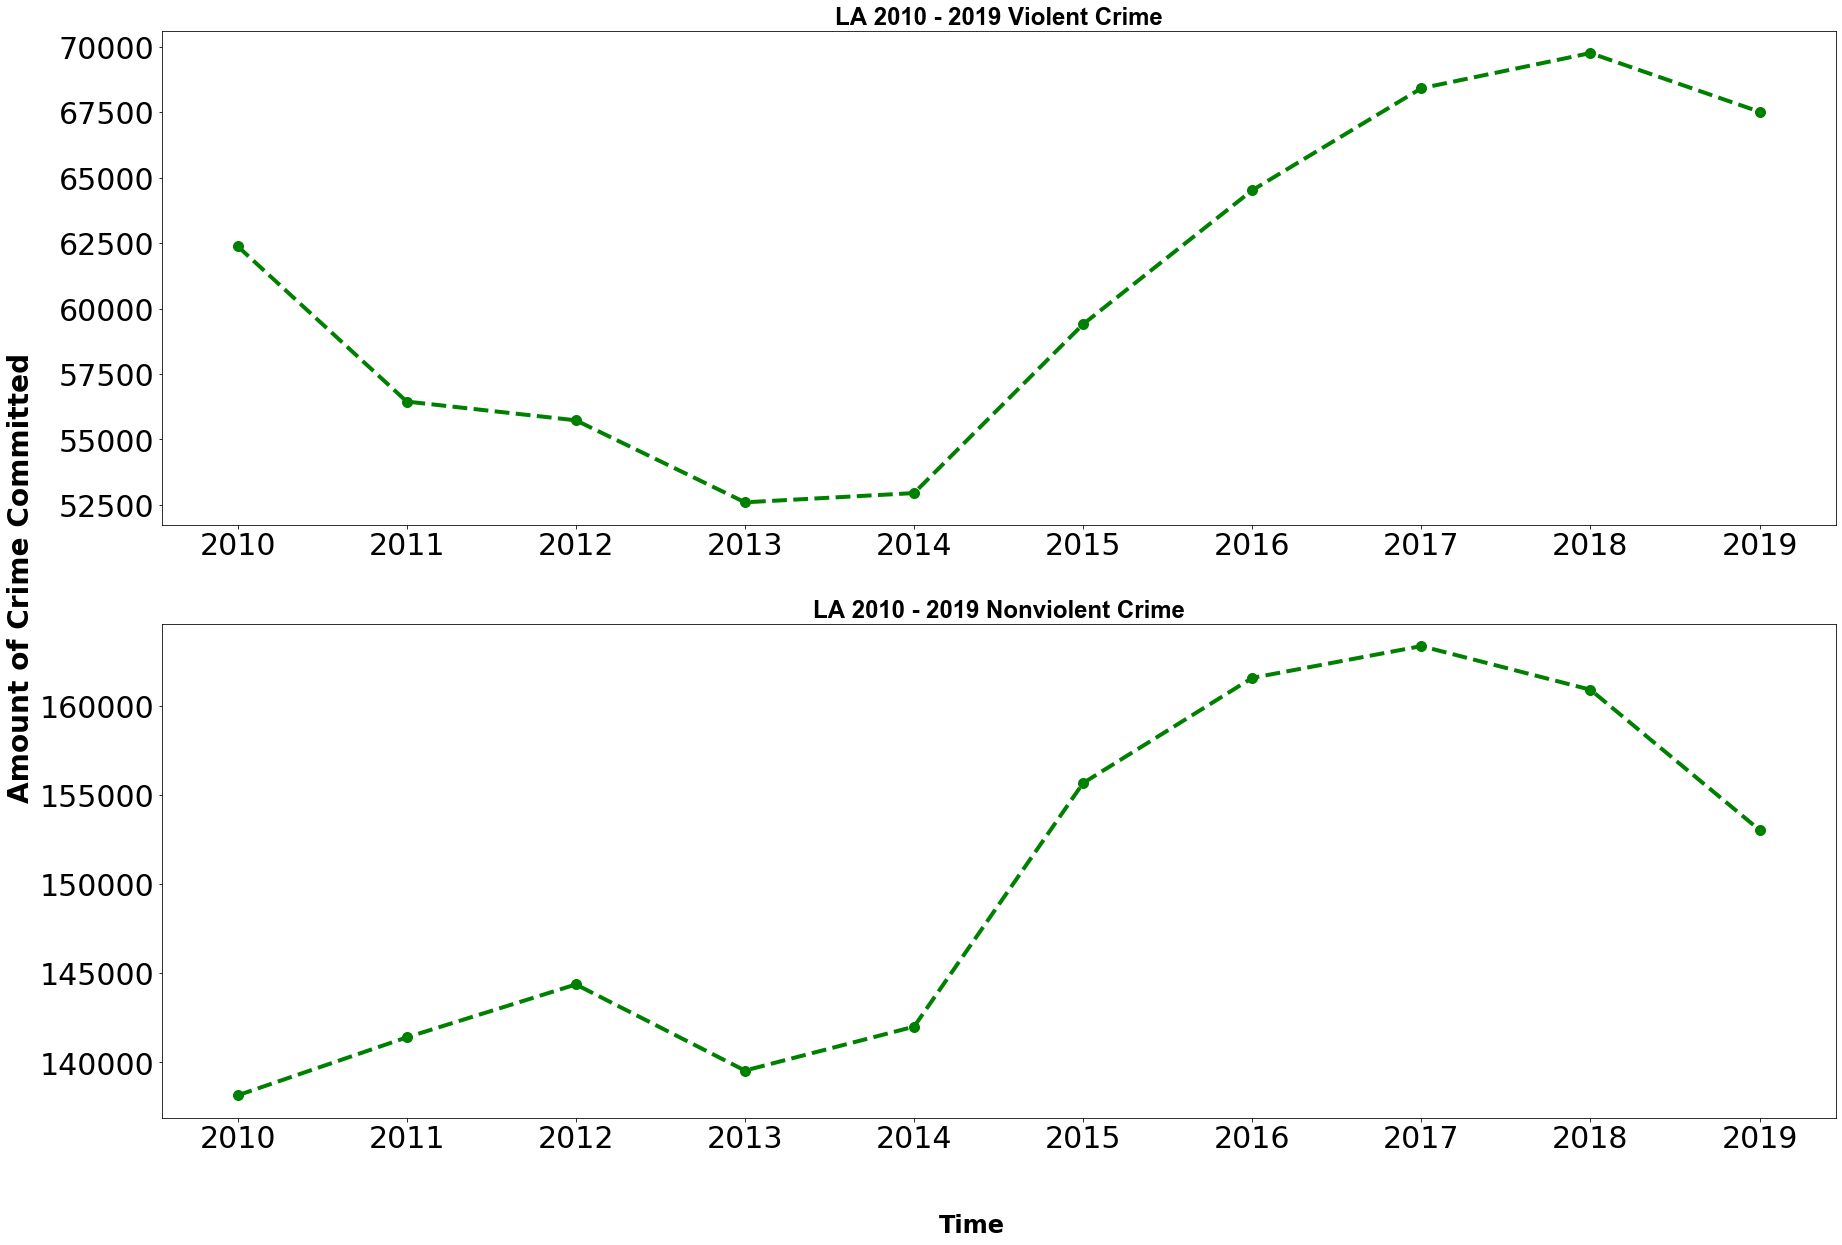

In [15]:
# Reading data from CSV file
df = pd.read_csv(r'CSV files/LA_Cleaned_Data_2010_to_2019.csv')

# Deviding dataframe to two dataframes 
df_violent = df.loc[df['categorized crime'] == 'violent']
df_nonviolent = df.loc[df['categorized crime'] == 'nonviolent']


#Create x-axis
date_list = ['2010','2011','2012','2013','2014','2015','2016','2017','2018','2019']

#Create y-axis
nonviolent_list = []
for year in date_list:
    df1 = df_nonviolent[df_nonviolent['Date'].str.contains(year)]
    nonviolent_list.append(df1.amount.sum())

violent_list = []
for year in date_list:
    df2 = df_violent[df_violent['Date'].str.contains(year)]
    violent_list.append(df2.amount.sum())

#Declare figure size
fig, (ax1, ax2) = plt.subplots(2, figsize = (30,20))
for ax in ax1,ax2:
    plt.setp(ax.get_xticklabels(), rotation = 0)
    for item in (ax.get_xticklabels() + ax.get_yticklabels()):
        item.set_fontsize(30)

#Label graph
ax1.set_title('LA 2010 - 2019 Violent Crime', fontdict = {'fontname': 'Arial', 'fontsize': 24, 'fontweight' : 'bold'})
ax2.set_title('LA 2010 - 2019 Nonviolent Crime', fontdict = {'fontname': 'Arial', 'fontsize': 24, 'fontweight' : 'bold'})
fig.text(0.5, 0.05, 'Time', ha='center', va='center', fontsize = 24, fontweight = 'bold')
fig.text(0.06, 0.5, 'Amount of Crime Committed', ha='center', va='center', rotation='vertical', fontsize = 28, fontweight = 'bold')

#Create line graph
ax1.plot(date_list, violent_list, color = 'green', linewidth = '4', linestyle = '--' , marker = '.', markersize = 20)
ax2.plot(date_list, nonviolent_list, color = 'green', linewidth = '4', linestyle = '--' , marker = '.', markersize = 20)

These graphs illustrate the yearly amount of crime in Los Angeles throughout the decade. Both violent and nonviolent crimes have increased from 2014 to 2017. From 2018 to 2019, both violent and nonviolent crime decreased. In general, both violent and nonviolent crimes have increased throughout the decade. For example, violent crimes increased from 62,500 to 67,500 and nonviolent crimes increased from 140,000 to 155,000.

### Graphing San Francisco Data

Text(17.8, 8100, 'BLM Protests')

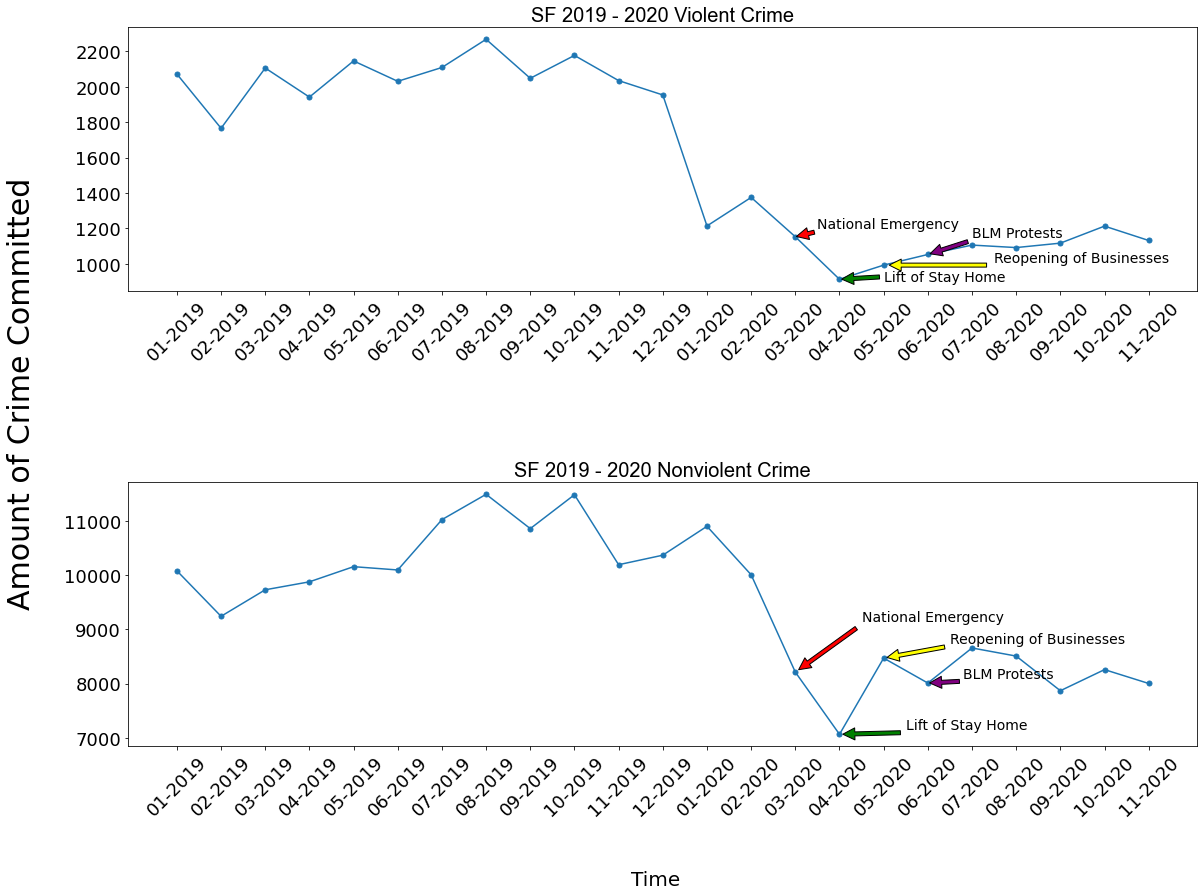

In [98]:
#Create x-axis
date = df_SFviolent['Date'].to_numpy()
date_list = list(date)

#Create y-axis
violent = df_SFviolent['amount'].to_numpy()
violent_list = list(violent)

nonviolent = df_SFnonviolent['amount'].to_numpy()
nonviolent_list = list(nonviolent)

#Declare figure size
fig, (ax1, ax2) = plt.subplots(2, figsize = (20,15))
fig.tight_layout(pad=17.0)
for ax in ax1,ax2:
    plt.setp(ax.get_xticklabels(), rotation = 45)
    for item in (ax.get_xticklabels() + ax.get_yticklabels()):
        item.set_fontsize(18) 

#Label graph
ax1.set_title('SF 2019 - 2020 Violent Crime', fontdict = {'fontname': 'Arial', 'fontsize': 20})
ax2.set_title('SF 2019 - 2020 Nonviolent Crime', fontdict = {'fontname': 'Arial', 'fontsize': 20})
fig.text(0.5, 0.05, 'Time', ha='center', va='center', fontsize = 20)
fig.text(0.06, 0.5, 'Amount of Crime Committed', ha='center', va='center', rotation='vertical', fontsize = 30)

#Create line graph
ax1.plot(date_list, violent_list, marker = '.', markersize = 10)
ax2.plot(date_list, nonviolent_list, marker = '.', markersize = 10)

#Annotating the important point
ax1.annotate('National Emergency', xy=(14, 1153), xytext=(14.5, 1200), fontsize = 14, arrowprops=dict(facecolor='red', shrink=0.05), )
ax1.annotate('Lift of Stay Home', xy=(15, 913), xytext=(16, 905), fontsize = 14, arrowprops=dict(facecolor='green', shrink=0.05), )
ax1.annotate('Reopening of Businesses', xy=(16, 993), xytext=(18.5, 1010), fontsize = 14, arrowprops=dict(facecolor='yellow', shrink=0.05), )
ax1.annotate('BLM Protests', xy=(17, 1053), xytext=(18, 1150), fontsize = 14,arrowprops=dict(facecolor='purple', shrink=0.05), )
ax2.annotate('National Emergency', xy=(14, 8212), xytext=(15.5, 9150), fontsize = 14, arrowprops=dict(facecolor='red', shrink=0.05), )   
ax2.annotate('Lift of Stay Home', xy=(15, 7063), xytext=(16.5, 7150), fontsize = 14, arrowprops=dict(facecolor='green', shrink=0.05), )          
ax2.annotate('Reopening of Businesses', xy=(16, 8471), xytext=(17.5, 8750), fontsize = 14, arrowprops=dict(facecolor='yellow', shrink=0.05), )          
ax2.annotate('BLM Protests', xy=(17, 8010), xytext=(17.8, 8100), fontsize = 14, arrowprops=dict(facecolor='purple', shrink=0.05), )          

These San Francisco graphs display the changes in crime in each month for the past year. There are no notable outliers. We used a diagnostic approach to analyze our data in order to find possible explanations for the changes in crime rate. Throughout the years, nonviolent crime is higher than violent crime. In addition, the amount of crime committed in the months of 2019 were much higher compared to the amount of crime committed in months of 2020. For example, nonviolent crimes in 2019 ranged from 10,000 to 12,000, while nonviolent crimes in 2020 ranged from 7,000 to 9,000.

When comparing the first significant event in March, the pandemic emergency, to the trends in crime, there was a decrease in both nonviolent and violent crime. In general, crime started decreasing in February when covid-19 was spreading but was not yet announced as a national emergency. With the increase in unemployment rate by almost 13% from March to April, both nonviolent crimes and violent crimes dropped significantly. When outdoor businesses reopened in May, there was a steady increase in violent crime and a sudden decrease in nonviolent crime. The decrease in nonviolent or property crime may be due to business owners reopening, working in the stores, and protecting the stores. By June, both nonviolent and violent rates were gradually increasing. This increase in crime may be explained by the BLM protest occurring throughout June and July.

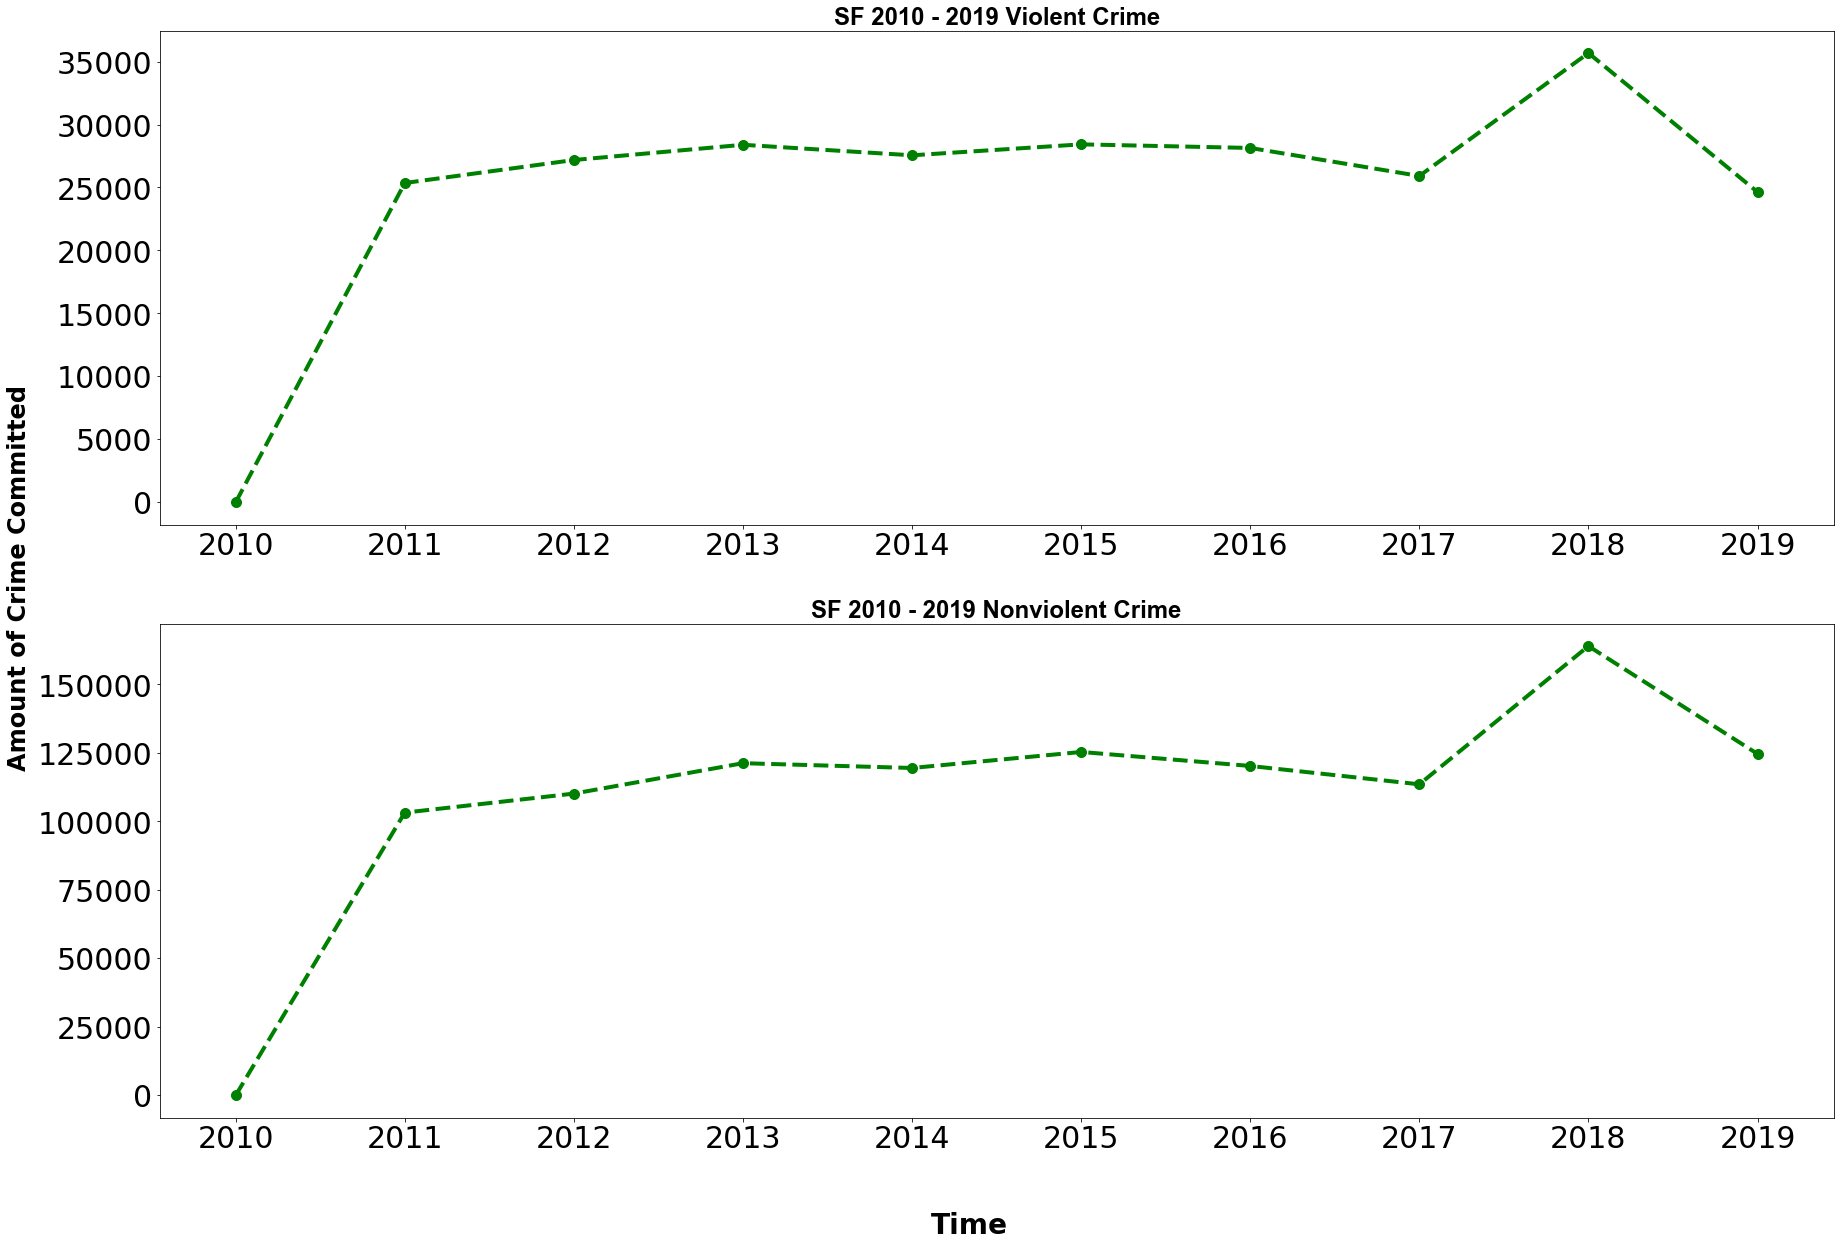

In [17]:
# Reading data from CSV file
df = pd.read_csv(r'CSV files/SF_Cleaned_Data_2010_to_2019.csv')

# Deviding dataframe to two dataframes 
df_violent = df.loc[df['categorized crime'] == 'violent']
df_nonviolent = df.loc[df['categorized crime'] == 'nonviolent']


#Create x-axis
date_list = ['2010','2011','2012','2013','2014','2015','2016','2017','2018','2019']

#Create y-axis
nonviolent_list = []
for year in date_list:
    df1 = df_nonviolent[df_nonviolent['Date'].str.contains(year)]
    nonviolent_list.append(df1.amount.sum())

violent_list = []
for year in date_list:
    df2 = df_violent[df_violent['Date'].str.contains(year)]
    violent_list.append(df2.amount.sum())

#Declare figure size
fig, (ax1, ax2) = plt.subplots(2, figsize = (30,20))
for ax in ax1,ax2:
    plt.setp(ax.get_xticklabels(), rotation = 0)
    for item in (ax.get_xticklabels() + ax.get_yticklabels()):
        item.set_fontsize(30)

#Label graph
ax1.set_title('SF 2010 - 2019 Violent Crime', fontdict = {'fontname': 'Arial', 'fontsize': 24, 'fontweight' : 'bold'})
ax2.set_title('SF 2010 - 2019 Nonviolent Crime', fontdict = {'fontname': 'Arial', 'fontsize': 24, 'fontweight' : 'bold'})
fig.text(0.5, 0.05, 'Time', ha='center', va='center', fontsize = 28, fontweight = 'bold')
fig.text(0.06, 0.5, 'Amount of Crime Committed', ha='center', va='center', rotation='vertical', fontsize = 24, fontweight = 'bold')

#Create line graph
ax1.plot(date_list, violent_list, color = 'green', linewidth = '4', linestyle = '--' , marker = '.', markersize = 20)
ax2.plot(date_list, nonviolent_list, color = 'green', linewidth = '4', linestyle = '--' , marker = '.', markersize = 20)

The 2010 - 2019 San Francisco graphs display the change in crime rates throughout the decade. The amount of violent crime drastically drops from 2017 to 2018. The reason for the drop was because San Francisco implemented more citywide uniformed foot patrols. In general, nonviolent crimes have gradually increased throughout the decade. Violent crimes may have experienced an increase as well if it was not due to the sudden drop in 2018.

### Graphing San Diego Data

Text(17.5, 1200, 'BLM Protests')

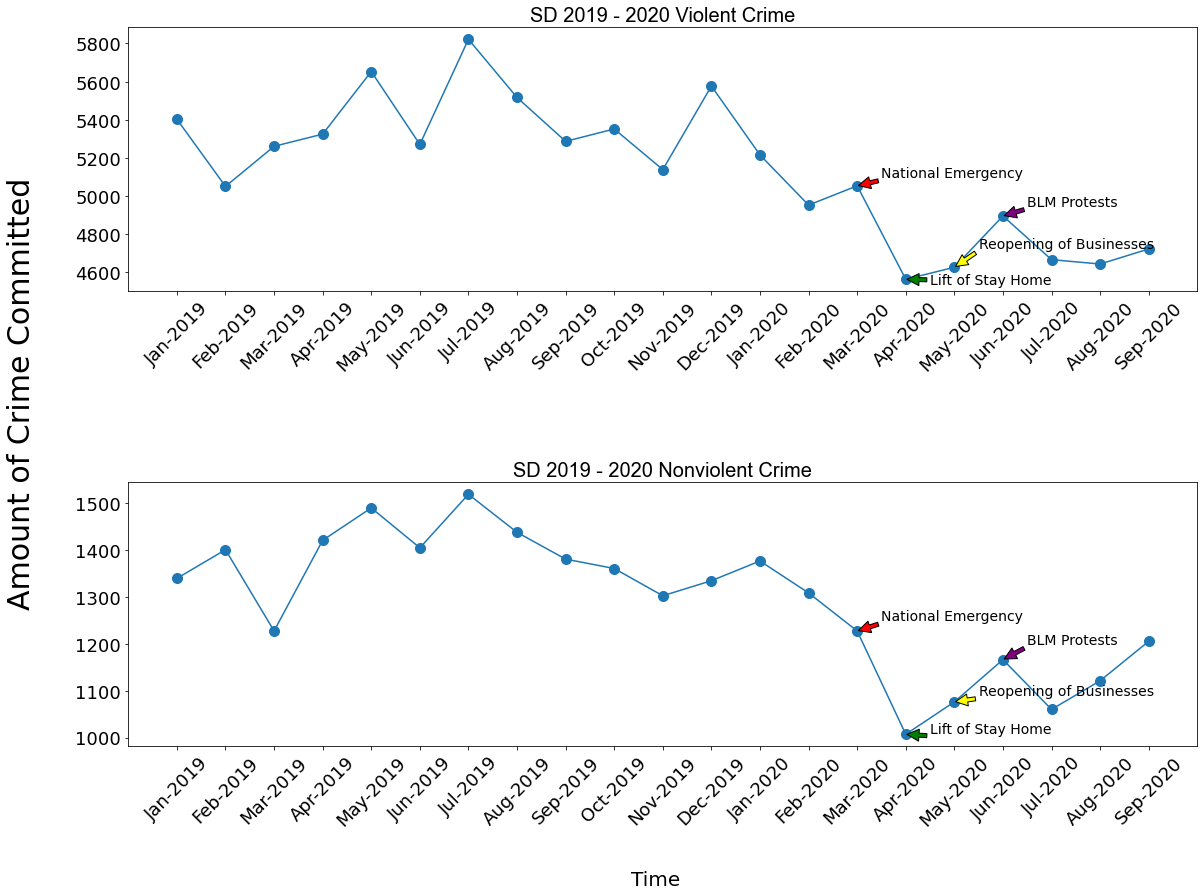

In [100]:
#Create x-axis
date = df_SDviolent['Date'].to_numpy()
date_list = list(date)

#Create y-axis
violent = df_SDviolent['amount'].to_numpy()
violent_list = list(violent)


nonviolent = df_SDnonviolent['amount'].to_numpy()
nonviolent_list = list(nonviolent)


#Declare figure size
fig, (ax1, ax2) = plt.subplots(2, figsize = (20,15))
fig.tight_layout(pad=17.0)

for ax in ax1,ax2:
    plt.setp(ax.get_xticklabels(), rotation = 45)
    for item in (ax.get_xticklabels() + ax.get_yticklabels()):
        item.set_fontsize(18)
#Label graph
ax1.set_title('SD 2019 - 2020 Violent Crime', fontdict = {'fontname': 'Arial', 'fontsize': 20})
ax2.set_title('SD 2019 - 2020 Nonviolent Crime', fontdict = {'fontname': 'Arial', 'fontsize': 20})
fig.text(0.5, 0.05, 'Time', ha='center', va='center', fontsize = 20)
fig.text(0.06, 0.5, 'Amount of Crime Committed', ha='center', va='center', rotation='vertical', fontsize = 30)

#Create line graph
ax1.plot(date_list, violent_list,  marker = '.', markersize = 20)
ax2.plot(date_list, nonviolent_list,  marker = '.', markersize = 20)

#Annotating the important point
ax1.annotate('National Emergency', xy=(14, 5054), xytext=(14.5, 5100), fontsize = 14, arrowprops=dict(facecolor='red', shrink=0.05), )
ax1.annotate('Lift of Stay Home', xy=(15, 4564), xytext=(15.5, 4540), fontsize = 14, arrowprops=dict(facecolor='green', shrink=0.05), )
ax1.annotate('Reopening of Businesses', xy=(16, 4627), xytext=(16.5, 4730), fontsize = 14, arrowprops=dict(facecolor='yellow', shrink=0.05), )
ax1.annotate('BLM Protests', xy=(17, 4896), xytext=(17.5, 4950), fontsize = 14, arrowprops=dict(facecolor='purple', shrink=0.05), )
ax2.annotate('National Emergency', xy=(14, 1227), xytext=(14.5, 1250), fontsize = 14, arrowprops=dict(facecolor='red', shrink=0.05), )   
ax2.annotate('Lift of Stay Home', xy=(15, 1007), xytext=(15.5, 1010), fontsize = 14, arrowprops=dict(facecolor='green', shrink=0.05), )          
ax2.annotate('Reopening of Businesses', xy=(16, 1076), xytext=(16.5, 1090), fontsize = 14, arrowprops=dict(facecolor='yellow', shrink=0.05), )          
ax2.annotate('BLM Protests', xy=(17, 1166), xytext=(17.5, 1200), fontsize = 14, arrowprops=dict(facecolor='purple', shrink=0.05), )          

These graphs demonstrate the change in nonviolent and violent crimes in every month for the past year. There are no notable outliers in our graph. Throughout the entire year, violent crime is higher than nonviolent crime. When comparing the crime rates in the months of 2020 to the crime rates in the months of 2019, there is an obvious drop in the amount of crimes. In 2019, violent crimes ranged from 5000 to 5800, while violent crimes in 2020 ranged from 4600 to 5000. Similarly, the nonviolent crimes in 2019 ranged from 1200 to 1500, while the nonviolent crimes after the pandemic ranged from 1000 to 1300. 

From March to April, there was a decrease in both violent and nonviolent crimes when the pandemic became a national emergency. In April, when the stay in order was lifted, there was a surprisingly sharp drop in both violent and nonviolent crime. By May and June, both violent and nonviolent crime rates gradually increased. The increase in crime may be explained by the protests for Floyd.

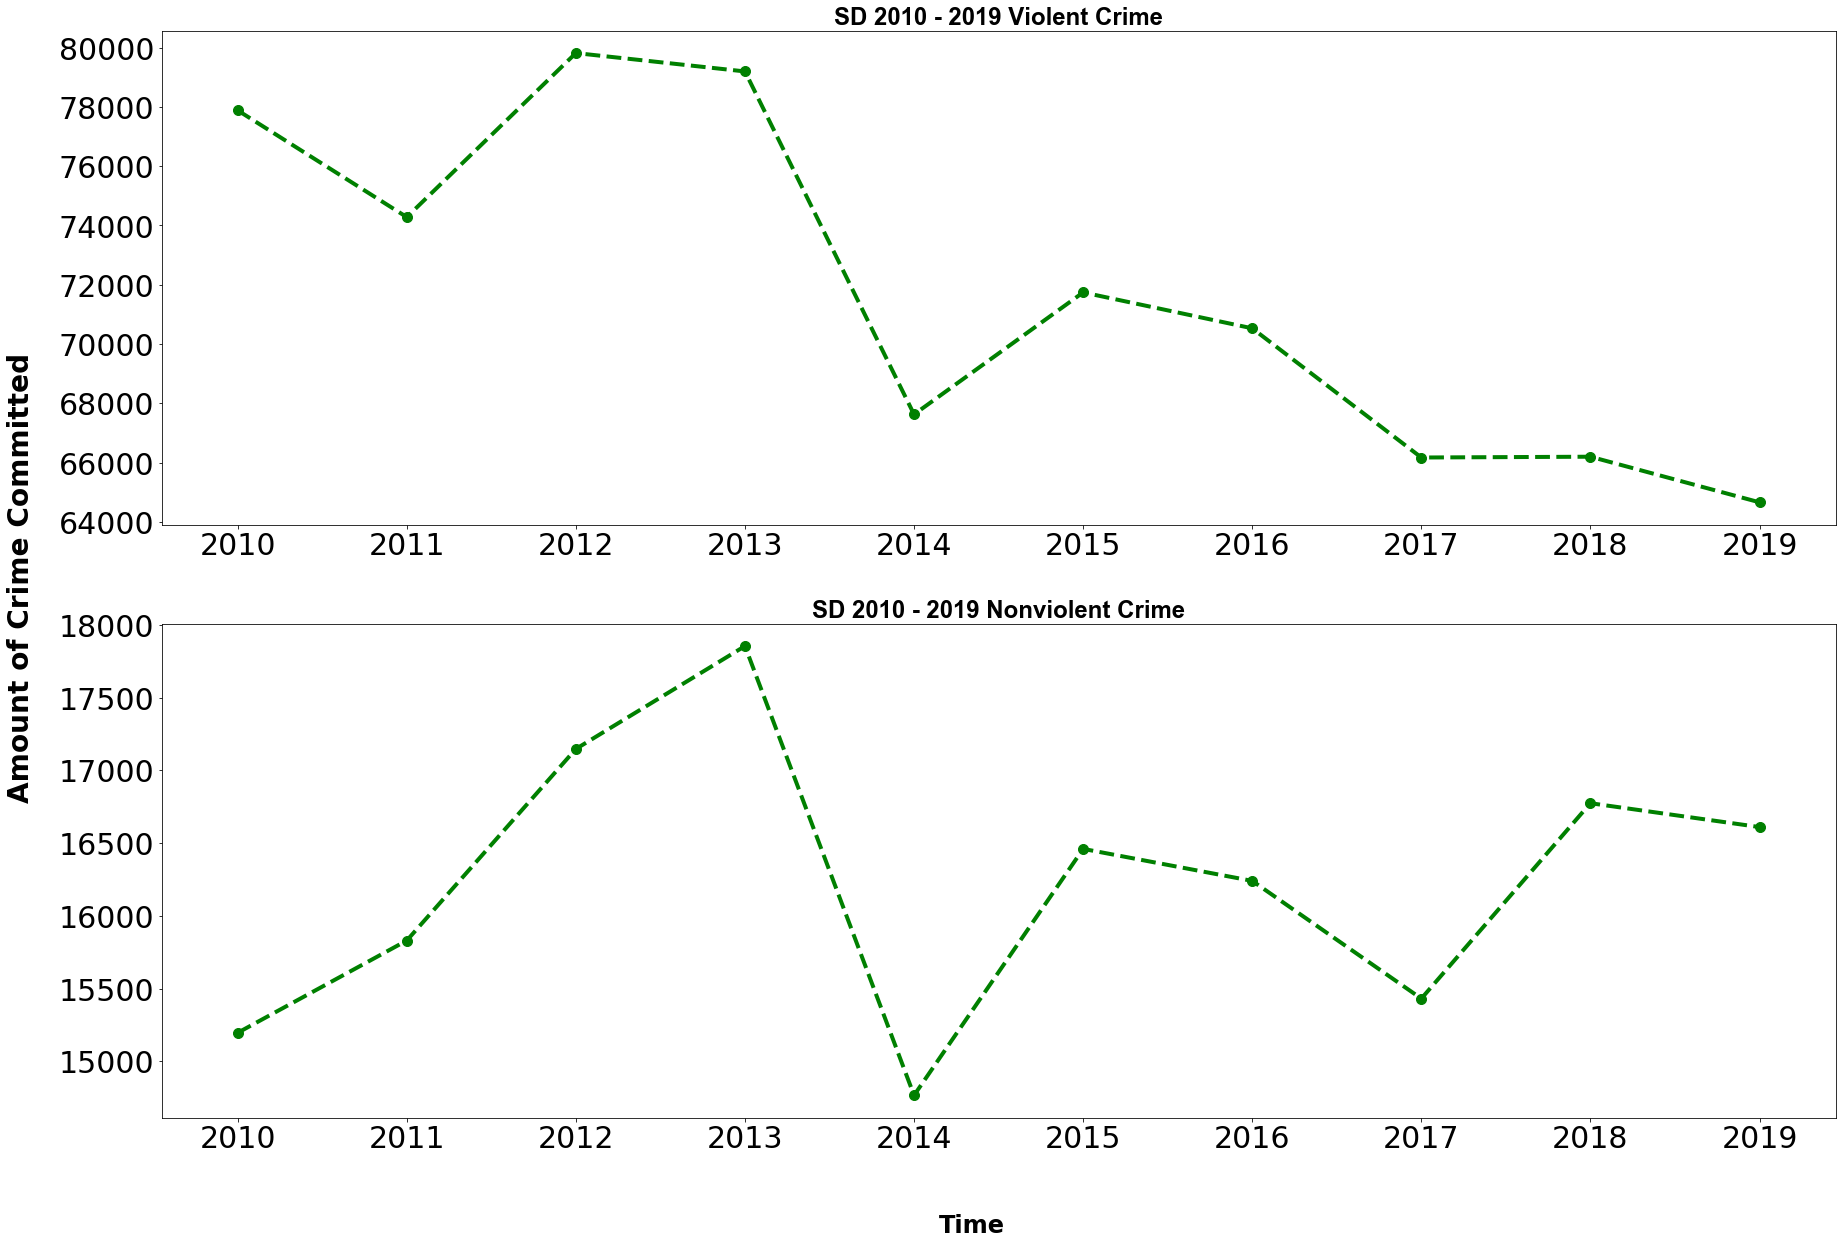

In [19]:
# Reading data from CSV file
df = pd.read_csv(r'CSV files/SD_Cleaned_Data_2010_to_2019.csv')

# Deviding dataframe to two dataframes 
df_violent = df.loc[df['categorized crime'] == 'violent']
df_nonviolent = df.loc[df['categorized crime'] == 'nonviolent']


#Create x-axis
date_list = ['2010','2011','2012','2013','2014','2015','2016','2017','2018','2019']

#Create y-axis
nonviolent_list = []
for year in date_list:
    df1 = df_nonviolent[df_nonviolent['Date'].str.contains(year)]
    nonviolent_list.append(df1.amount.sum())

violent_list = []
for year in date_list:
    df2 = df_violent[df_violent['Date'].str.contains(year)]
    violent_list.append(df2.amount.sum())

#Declare figure size
fig, (ax1, ax2) = plt.subplots(2, figsize = (30,20))
for ax in ax1,ax2:
    plt.setp(ax.get_xticklabels(), rotation = 0)
    for item in (ax.get_xticklabels() + ax.get_yticklabels()):
        item.set_fontsize(30)

#Label graph
ax1.set_title('SD 2010 - 2019 Violent Crime', fontdict = {'fontname': 'Arial', 'fontsize': 24, 'fontweight' : 'bold'})
ax2.set_title('SD 2010 - 2019 Nonviolent Crime', fontdict = {'fontname': 'Arial', 'fontsize': 24, 'fontweight' : 'bold'})
fig.text(0.5, 0.05, 'Time', ha='center', va='center', fontsize = 24, fontweight = 'bold')
fig.text(0.06, 0.5, 'Amount of Crime Committed', ha='center', va='center', rotation='vertical', fontsize = 28, fontweight = 'bold')

#Create line graph
ax1.plot(date_list, violent_list, color = 'green', linewidth = '4', linestyle = '--' , marker = '.', markersize = 20)
ax2.plot(date_list, nonviolent_list, color = 'green', linewidth = '4', linestyle = '--' , marker = '.', markersize = 20)

The San Diego 2010 to 2019 graphs demonstrate the yearly crime trends throughout the decade. Both violent and nonviolent crimes experienced a sudden decrease from 2013 to 2014 and an increase from 2014 to 2015. Violent crimes have decreased in general from 2010 to 2019, while nonviolent crimes have increased. When comparing the San Diego decade graph to the decade graphs of other cities, the decrease in violent crime is an outlier. In both Los Angeles and San Francisco, crime rates in general have increased throughout the decade.

### Comparing 2019 - 2020 to the 2010 - 2019 Graphs

By comparing the crime statistics from 2020 to the data from 2019, we were able to determine a sense of increase or decrease in crime. However, we also wanted to see whether the amount of criminal offenses this year was inline with the crime trends from the last decade or if the crime rates were an outlier caused by the current events such as the pandemic of this year. After analyzing the data from the past decade, there has been a general overall increase in both violent and nonviolent crime for all three cities with only violent crimes in San Diego as an outlier. While crime rates have increased in the past decade, the violent crime rates in San Diego decreased in the past decade. Without this outlier, we can see that the declining crime rates in 2020 observed in all three cities does not fit into the overall trend of the last 10 years because crime rates had been increasing. Therefore, the pandemic has affected the amount of crime to a certain extent. 

# Ethics & Privacy

We understand and respect that our topic on crime rates may delve into sensitive personal backgrounds. We aim to use only published statistics for our datasets as well as minimize the identifiable information to only date and type of crime. These datasets do not pose any privacy concerns because they are published by government agencies of cities with over 850,000 population. Furthermore, all crime reports are inherently purged for and do not contain any explicit personal information, meaning there should be no additional measures that we need to enact. We also understand that our topic can be used to draw inaccurate conclusions about populations of certain areas, which is why we aim to use data from different cities in California to analyze and contribute to an overall conclusion.


# Conclusion & Discussion

The purpose of our project was to find out whether crime rates have dramatically changed in California because of the pandemic. We hypothesized that violent crimes in California would decrease due to a decrease in public events and nonviolent crimes (property crimes) would increase due to economic hardships. In addition, we also predicted that significant events also influenced the changes in crime rate. For our research, we found datasets for 3 of the most populated cities in California: Los Angeles, San Francisco, and San Diego. Each city has a population of over 850,000. After cleaning the dataframes for each of the three cities, we graphed the amount of crime both monthly and yearly in order to compare the crime rate trends from the past year as well as the past decade. 
 
Our prediction was not completely correct; violent crimes decreased as we predicted, but there was no rise in nonviolent crime as outlined in our hypothesis. When comparing the data from 2020 to the past year, there was a significant drop in overall crime rates when the pandemic started which we foresaw. However, we also anticipated that economic hardships would play a large role in increasing cases of nonviolent crimes. Instead, nonviolent crimes did not increase and surprisingly decreased when compared with the gradual increase in the unemployment rate from March to April. In addition, as unemployment rates decreased, the crime rates in general for all three cities did not decrease either. Therefore, we conclude that unemployment rates do not have a strong relationship with crime rates as we initially thought. We also compared the crime trends to significant events. When observing the amount of crime corresponding to certain significant events, we saw that there were clear changes in crime rate as different events such as the reopening of businesses or the protests for BLM. When comparing the crime rate from the pandemic to the crime rates in the past decade, the decline in crime for 2020 is not part of a 10 year trend. The crime rates tended to experience a gradual increase in the ten years, therefore, the decline in 2020 will lead to a dramatic decrease in the crime trend for the decade.

Our research gives us insight on how future pandemics may affect the crime rates in California. It is important to understand crime trends in order for law enforcements to efficiently allocate resources to serve the public. However, one of the limitations from our project is that we only looked at three urban cities in California. This data is not representative of the entirety of California as we were unable to assess the rural portions which make up most of the state’s mass. This limitation was mostly caused by the inability to gather suitable data from rural or suburban areas. We attempted to include a smaller city such as Chico, but we were not able to gather enough satisfactory data and in the end we’ve decided to drop the city.


# Team Contributions

- Dorsa Tayebipour: Background, Data Cleaning, Graphs
- Ethan Chen: Background, Data Analysis, Conclusion
- Josh Chou: Data Cleaning, Data Analysis, Ethics Privacy, Conclusion
- Sharon Hu: Data Cleaning, Data Analysis, Graphs, Ethics Privacy, Conclusion

## Works Cited
- https://www.nytimes.com/article/george-floyd-protests-timeline.html
- https://abc7news.com/timeline-of-coronavirus-us-covid-19-bay-area-sf/6047519/
- https://ycharts.com/indicators/california_unemployment_rate
